In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/depression.csv")

In [3]:
df = df.rename({'환자수 ': 'infected'}, axis='columns')

In [4]:
for i, j in enumerate(df['infected']):
    df['infected'][i] = int(j.replace(',',''))

In [5]:
year = []
month = []

for i in df["진료년월"]:
    year.append(i[0:4])
    month.append(i[6:])

In [6]:
df.insert(0, 'month', month)
df.insert(0, 'year', year)
df = df.drop("진료년월", axis=1)

In [7]:
df

,year,month,infected
0,2016,01월,237446
1,2016,02월,239425
2,2016,03월,254338
3,2016,04월,247658
4,2016,05월,250705
...,...,...,...
60,2021,01월,347573
61,2021,02월,346604
62,2021,03월,372249
63,2021,04월,370941


In [8]:
df_2019 = df[df['year'] == '2019']
df_2020 = df[df['year'] == '2020']
df_2021 = df[df['year'] == '2021']
df_2019

,year,month,infected
36,2019,01월,307129
37,2019,02월,284321
38,2019,03월,301539
39,2019,04월,310710
40,2019,05월,315383
41,2019,06월,306280
42,2019,07월,324369
43,2019,08월,320468
44,2019,09월,317411
45,2019,10월,329162


In [9]:
df_2019.columns

Index(['year', 'month', 'infected'], dtype='object')

/opt/anaconda3/envs/WebCrawler/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


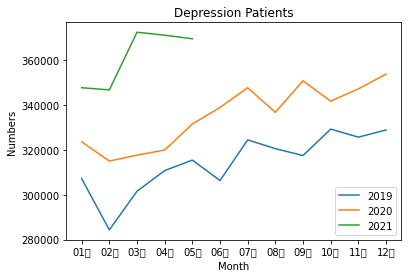

In [10]:
month = df_2019['month']

plt.plot(month, df_2019['infected'], label='2019')
plt.plot(month, df_2020['infected'], label='2020')
plt.plot(month[:5], df_2021['infected'], label = '2021')

plt.title("Depression Patients")
plt.xlabel("Month")
plt.ylabel("Numbers")
plt.legend()

In [11]:
grouped = df['infected'].groupby(df['year']).sum()
df_grouped = pd.DataFrame(grouped)
df_grouped

,infected
year,
2016,3003459
2017,3206026
2018,3535354
2019,3771133
2020,4023115
2021,1806707


Text(0, 0.5, 'Numbers')

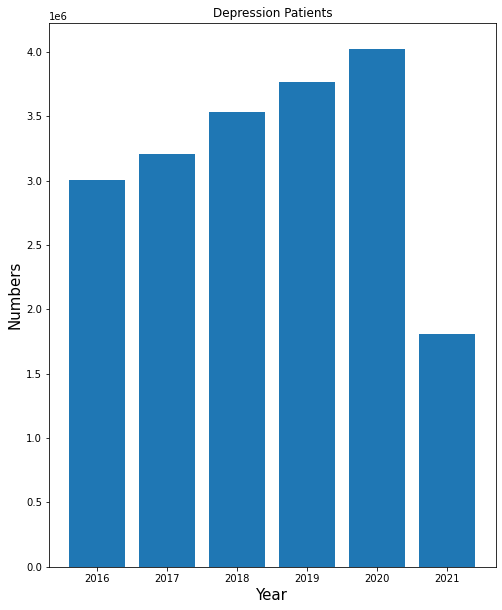

In [12]:
plt.figure(figsize = (8, 10))
plt.bar(df_grouped.index, df_grouped['infected'])

plt.title("Depression Patients")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Numbers", fontsize = 15)

/opt/anaconda3/envs/WebCrawler/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


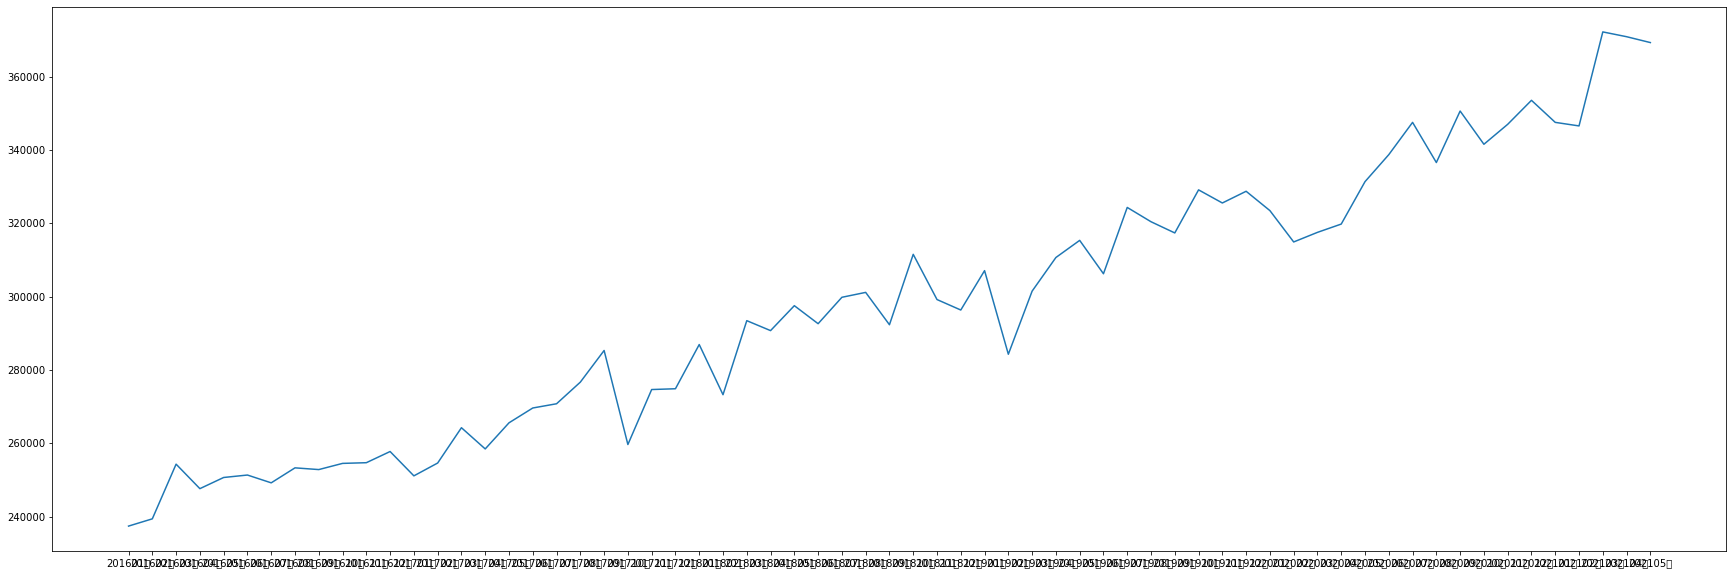

In [15]:
plt.figure(figsize = (30, 10))
plt.plot(df['year'] + df['month'], df['infected'])

In [16]:
df_2020

,year,month,infected
48,2020,01월,323503
49,2020,02월,314951
50,2020,03월,317569
51,2020,04월,319833
52,2020,05월,331404
53,2020,06월,338771
54,2020,07월,347572
55,2020,08월,336618
56,2020,09월,350663
57,2020,10월,341601
